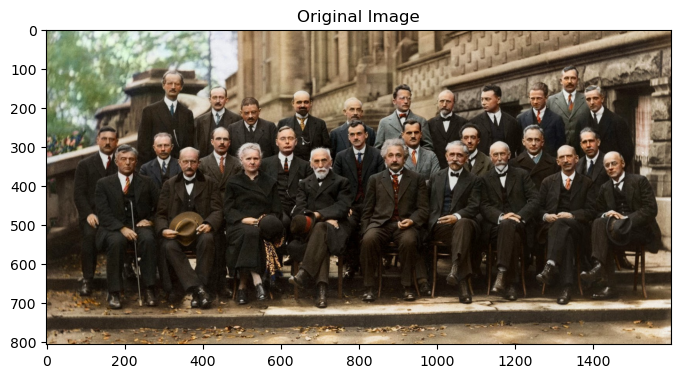

In [7]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 16):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Load & Show our input image
image = cv2.imread('C:/Users/USER/Desktop/Zh/University/Term6/Multimedia/HW/HW3/faces.jpg')
imshow("Original Image", image)

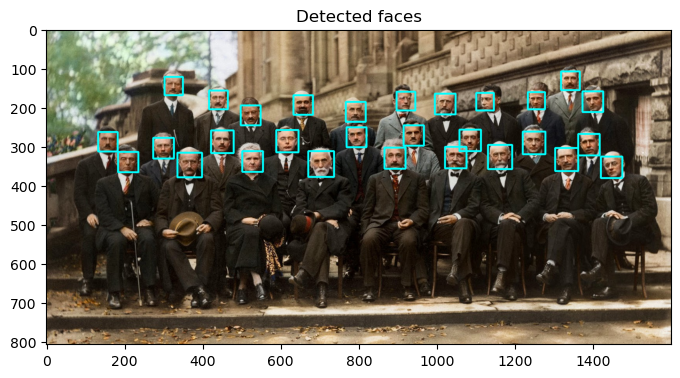

Number of detected faces: 29


In [8]:
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

# Applying the face detection method on the grayscale image
faces = cascade.detectMultiScale(gray, 1.2, 5)

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 3)

# Show Output image & print number of faces
imshow('Detected faces', image)
print("Number of detected faces:", len(faces))

In [9]:
# Below function will read video frames
cap = cv2.VideoCapture(0)

start_time = time.time()
# FPS update time in seconds
display_time = 2
fc = 0
FPS = 0

# Saving Video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('Realtime.mp4', fourcc, 20.0, (640, 480))
 
# Capturing & Calculating FPS
while True:
    read_ok, img = cap.read()
    if not read_ok:
        break
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fc+=1
    TIME = time.time() - start_time

    if (TIME) >= display_time :
        FPS = fc / (TIME)
        fc = 0
        start_time = time.time()

    fps_disp = "FPS: "+str(FPS)[:5]

    # Applying the face detection method on the grayscale image
    faces = cascade.detectMultiScale(gray, 1.2, 5)

    # Iterating through rectangles of detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)
    
    # Write FPS on each frame
    img = cv2.putText(img, fps_disp, (10, 25),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Imshow converts BGR to RGB while saving or displaying
    cv2.imshow('Video Stream w/ FPS', img)
    out.write(image) 
    key = cv2.waitKey(1) & 0xFF
                      
    # Press q to quit streaming
    if key == ord("q"):
        break
                      
cap.release()  
out.release() 
cv2.destroyAllWindows()